# **DNA Classification and Disease Risk Prediction**

## Importing Necessary Libraries


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

### **Downloading File From Kaggle**

In [50]:
from google.colab import files
files.upload()

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle datasets download -d miadul/dna-classification-dataset
!unzip dna-classification-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/miadul/dna-classification-dataset
License(s): CC0-1.0
  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 335MB/s]
Archive:  dna-classification-dataset.zip
  inflating: synthetic_dna_dataset.csv  


## **Dataset Reading**

In [12]:
df = pd.read_csv("synthetic_dna_dataset.csv")
print(df.head())

  Sample_ID                                           Sequence  GC_Content  \
0  SAMPLE_1  CTTTCGGGATACTTTTGGGATGGTCTTGGTCAAGGGTTTTAGCCCG...        50.0   
1  SAMPLE_2  TTGACCAAATTTGATTGGAAGTGGTAAGCGCGTATTCCTAGCATCA...        45.0   
2  SAMPLE_3  GCGTGAGTTCTAATTTAAAAAGTCGTAACACGTACCCCGGCGTGTA...        51.0   
3  SAMPLE_4  ACTACGCGGACAAGAACCAACAGAACCTGGTTTTCGCAAGGGAGTG...        55.0   
4  SAMPLE_5  TTCAATGCAGATTGAAAGTTACTTTCATCTGCCCTATGGGTCCCTT...        46.0   

   AT_Content  Sequence_Length  Num_A  Num_T  Num_C  Num_G  kmer_3_freq  \
0        50.0              100     22     28     19     31        0.986   
1        55.0              100     27     28     22     23        0.486   
2        49.0              100     26     23     30     21        0.367   
3        45.0              100     28     17     23     32        0.404   
4        54.0              100     24     30     25     21        0.818   

   Mutation_Flag Class_Label Disease_Risk  
0              0    Bacteria        

## Info

🔹 Features Description

Sample_ID → Unique identifier for each DNA sample

Sequence → DNA sequence (string of A, T, C, G)

GC_Content → Percentage of Guanine (G) and Cytosine (C) in the sequence

AT_Content → Percentage of Adenine (A) and Thymine (T) in the sequence

Sequence_Length → Total sequence length

Num_A → Number of Adenine bases

Num_T → Number of Thymine bases

Num_C → Number of Cytosine bases

Num_G → Number of Guanine bases

kmer_3_freq → Average 3-mer (triplet) frequency score

Mutation_Flag → Binary flag indicating mutation presence (0 = No, 1 = Yes)

Class_Label → Class of the sample (Human, Bacteria, Virus, Plant)

Disease_Risk → Risk level associated with the sample (Low / Medium / High)

In [13]:
df.shape

(3000, 13)

In [14]:
df.isnull().sum()

,0
Sample_ID,0
Sequence,0
GC_Content,0
AT_Content,0
Sequence_Length,0
Num_A,0
Num_T,0
Num_C,0
Num_G,0
kmer_3_freq,0


In [16]:
df['Class_Label'].value_counts()

,count
Class_Label,
Bacteria,761
Human,749
Plant,747
Virus,743


In [17]:
df['Disease_Risk'].value_counts()

,count
Disease_Risk,
High,1046
Low,978
Medium,976


In [54]:
df.describe()

,GC_Content,AT_Content,Sequence_Length,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag
count,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,50.120000,49.880000,100.0,24.950667,24.929333,25.004000,25.116000,0.547738,0.496667
std,5.062688,5.062688,0.0,4.317458,4.317702,4.349056,4.329603,0.258521,0.500072
min,34.000000,34.000000,100.0,11.000000,9.000000,10.000000,12.000000,0.100000,0.000000
25%,47.000000,47.000000,100.0,22.000000,22.000000,22.000000,22.000000,0.330000,0.000000
50%,50.000000,50.000000,100.0,25.000000,25.000000,25.000000,25.000000,0.543000,0.000000
75%,53.000000,53.000000,100.0,28.000000,28.000000,28.000000,28.000000,0.772250,1.000000
max,66.000000,66.000000,100.0,40.000000,42.000000,42.000000,42.000000,1.000000,1.000000


## **EDA**

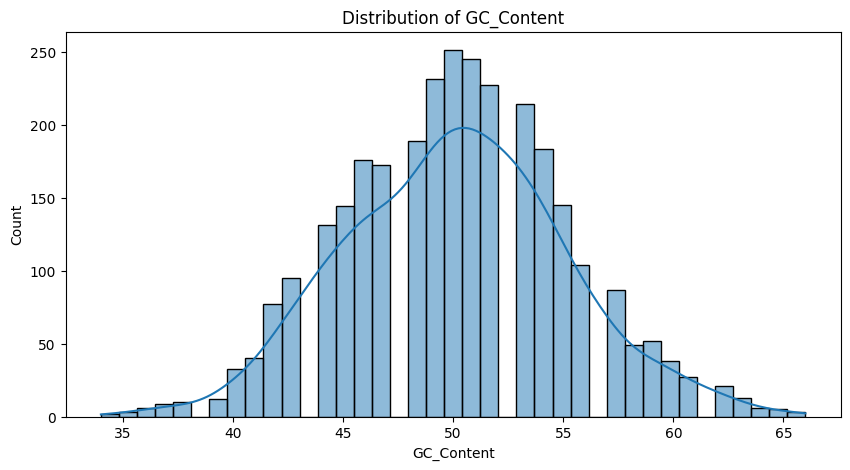

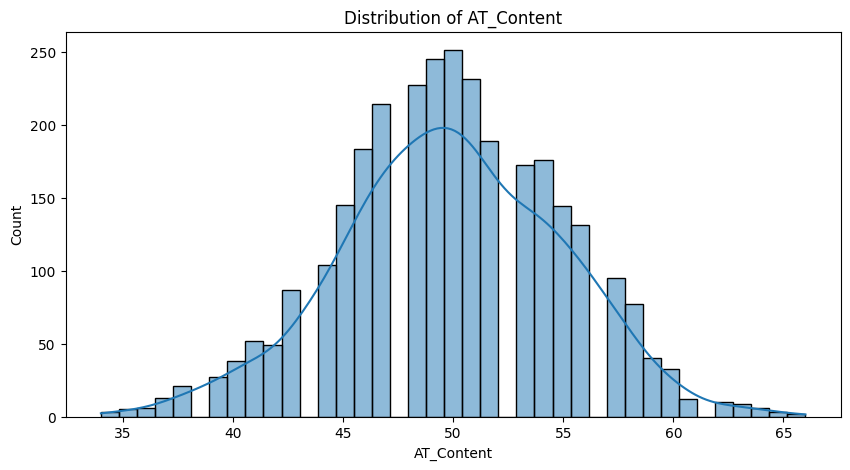

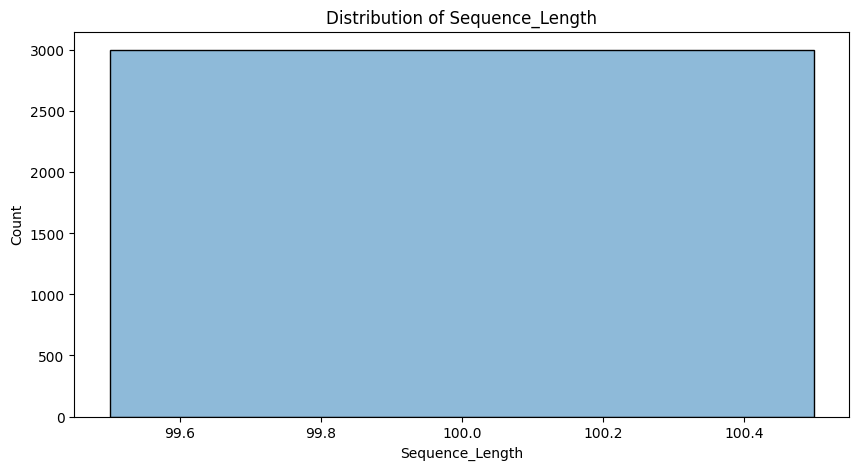

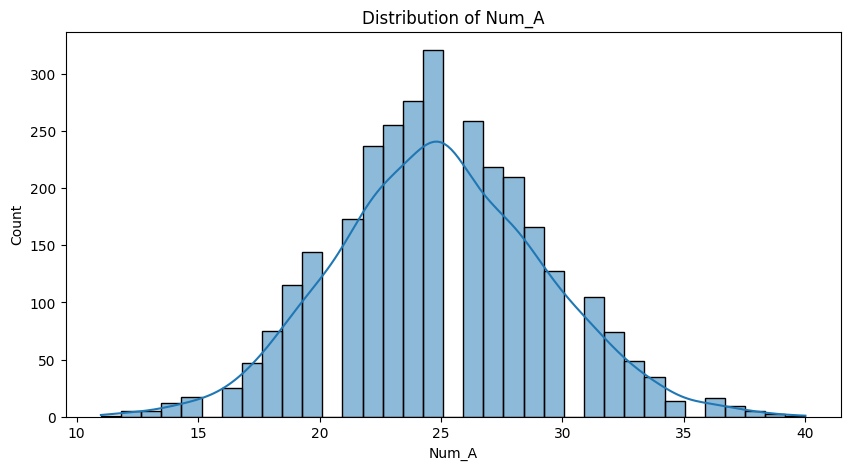

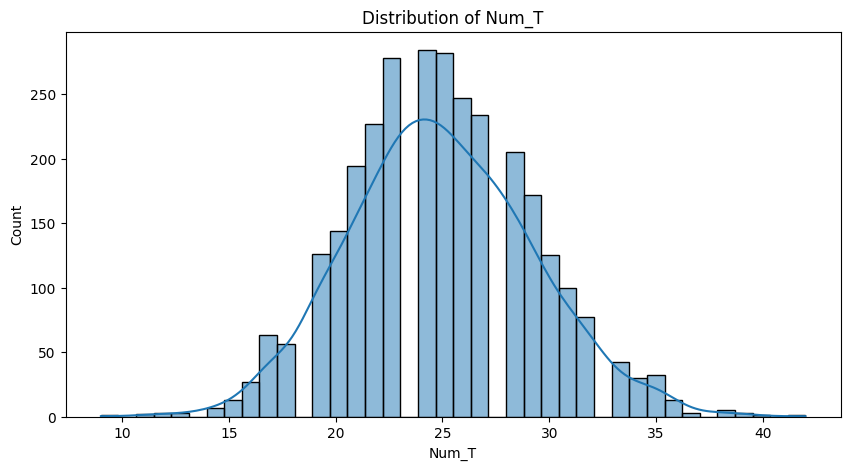

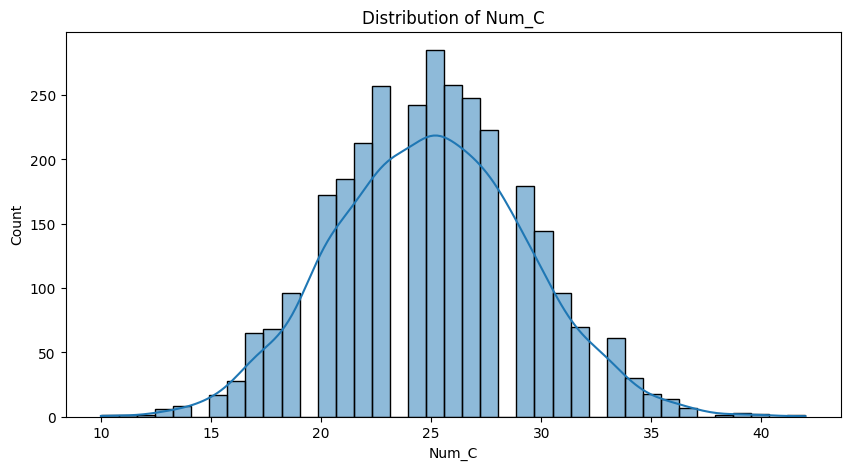

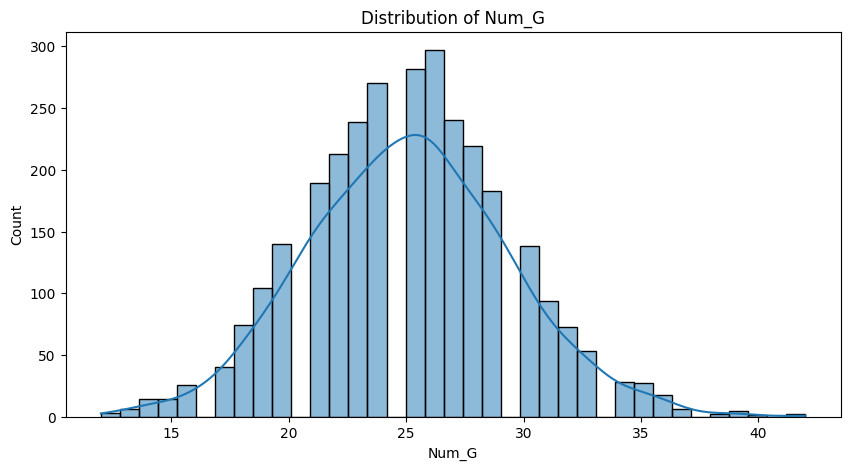

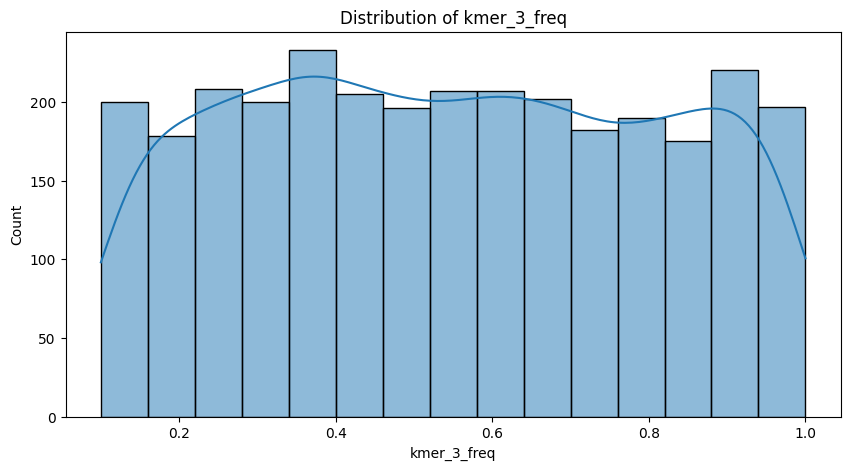

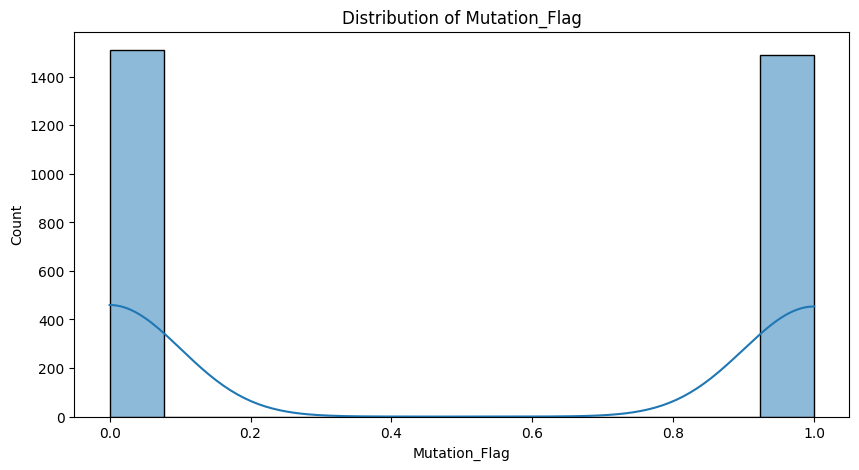

In [18]:
# distribution of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

/tmp/ipython-input-2695443860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class_Label', data=df,palette=['red', 'green', 'orange', 'purple'])


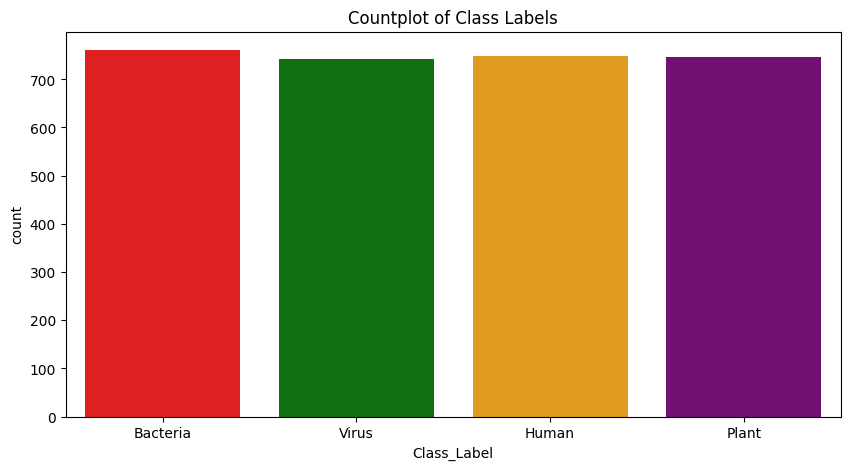

/tmp/ipython-input-2695443860.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Disease_Risk', data=df ,palette=['red', 'green', 'orange', 'purple'])
/tmp/ipython-input-2695443860.py:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x='Disease_Risk', data=df ,palette=['red', 'green', 'orange', 'purple'])


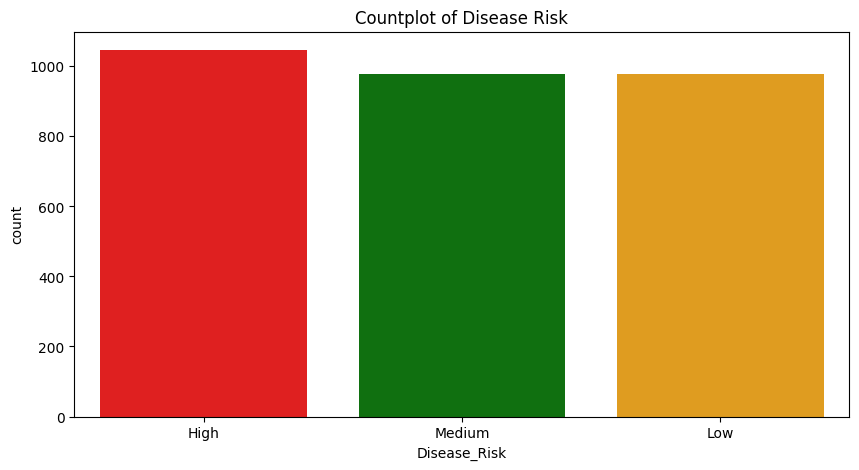

In [21]:
# Countplot of class labels, disease risk

plt.figure(figsize=(10, 5))
sns.countplot(x='Class_Label', data=df,palette=['red', 'green', 'orange', 'purple'])
plt.title('Countplot of Class Labels')
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(x='Disease_Risk', data=df ,palette=['red', 'green', 'orange', 'purple'])
plt.title('Countplot of Disease Risk')
plt.show()

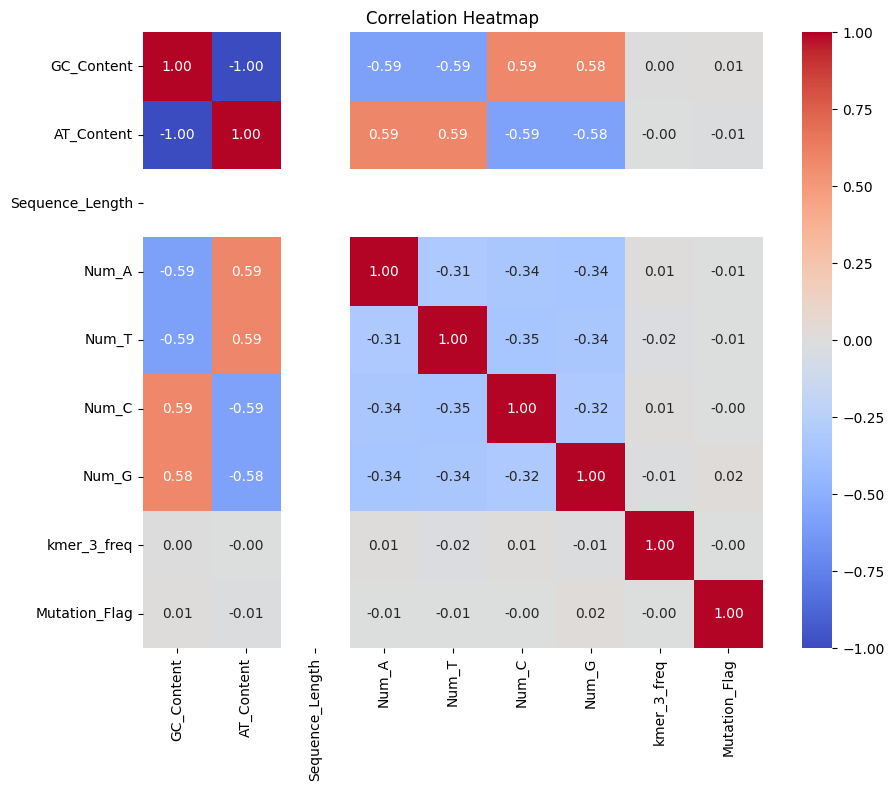

In [23]:
#Heatmap of correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## **Predicting species from DNA sequence Features**

In [25]:
x = df.drop(['Class_Label','Sample_ID','Disease_Risk', 'Sequence'], axis=1)
y = df['Class_Label']


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}
results = {}
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.27
              precision    recall  f1-score   support

    Bacteria       0.30      0.30      0.30       157
       Human       0.26      0.27      0.26       143
       Plant       0.25      0.24      0.24       152
       Virus       0.28      0.28      0.28       148

    accuracy                           0.27       600
   macro avg       0.27      0.27      0.27       600
weighted avg       0.27      0.27      0.27       600

[[47 39 39 32]
 [37 38 31 37]
 [38 41 36 37]
 [37 29 40 42]]
SVM Accuracy: 0.25
              precision    recall  f1-score   support

    Bacteria       0.21      0.20      0.21       157
       Human       0.30      0.44      0.35       143
       Plant       0.24      0.25      0.24       152
       Virus       0.24      0.13      0.17       148

    accuracy                           0.25       600
   macro avg       0.25      0.26      0.24       600
weighted avg       0.25      0.25      0.24       600

[[32 57 43 25]
 [36 6

/tmp/ipython-input-1411377607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()),palette=['red', 'green', 'orange', 'purple','blue','lime'])


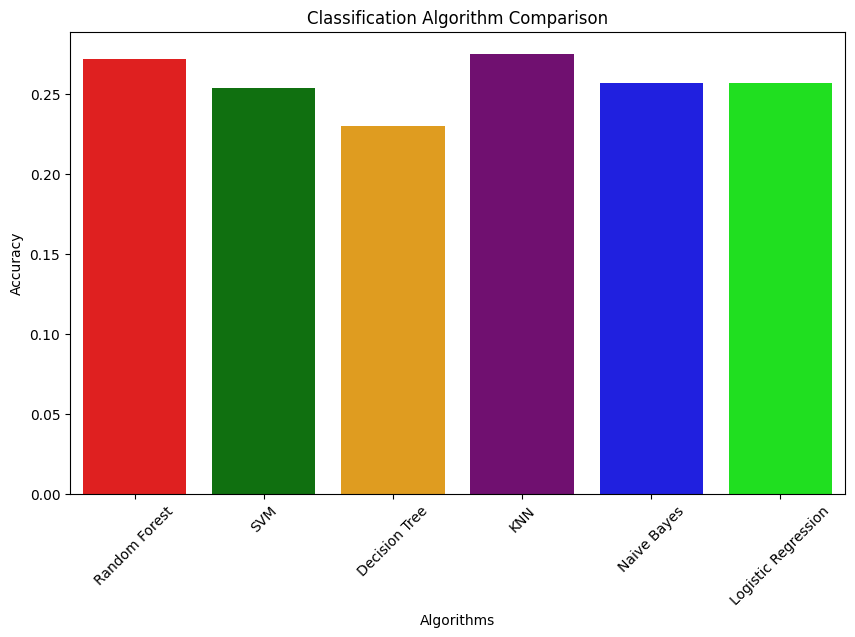

In [37]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()),palette=['red', 'green', 'orange', 'purple','blue','lime'])
plt.title('Classification Algorithm Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

## **Predicting Disease Risk**

In [38]:
X_d=df.drop(['Sample_ID','Disease_Risk','Sequence'], axis=1)
y_d=df['Disease_Risk']

In [40]:
le = LabelEncoder()
X_d['Class_Label'] = le.fit_transform(X_d['Class_Label'])

In [41]:
#split the data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

Random Forest Disease Risk Accuracy: 0.38
              precision    recall  f1-score   support

        High       0.34      0.35      0.35       208
         Low       0.37      0.44      0.40       189
      Medium       0.43      0.34      0.38       203

    accuracy                           0.38       600
   macro avg       0.38      0.38      0.38       600
weighted avg       0.38      0.38      0.38       600

[[73 78 57]
 [69 83 37]
 [72 61 70]]
SVM Disease Risk Accuracy: 0.35


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        High       0.35      1.00      0.52       208
         Low       0.00      0.00      0.00       189
      Medium       0.00      0.00      0.00       203

    accuracy                           0.35       600
   macro avg       0.12      0.33      0.17       600
weighted avg       0.12      0.35      0.18       600

[[208   0   0]
 [189   0   0]
 [202   1   0]]
Decision Tree Disease Risk Accuracy: 0.35
              precision    recall  f1-score   support

        High       0.36      0.36      0.36       208
         Low       0.36      0.38      0.37       189
      Medium       0.34      0.33      0.33       203

    accuracy                           0.35       600
   macro avg       0.35      0.35      0.35       600
weighted avg       0.35      0.35      0.35       600

[[74 63 71]
 [62 71 56]
 [72 65 66]]
KNN Disease Risk Accuracy: 0.35
              precision    recall  f1-score   support

        High       0.33   

/tmp/ipython-input-2548555813.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results_d.keys()), y=list(results_d.values()),palette=['red', 'green', 'orange', 'purple','blue','lime'])


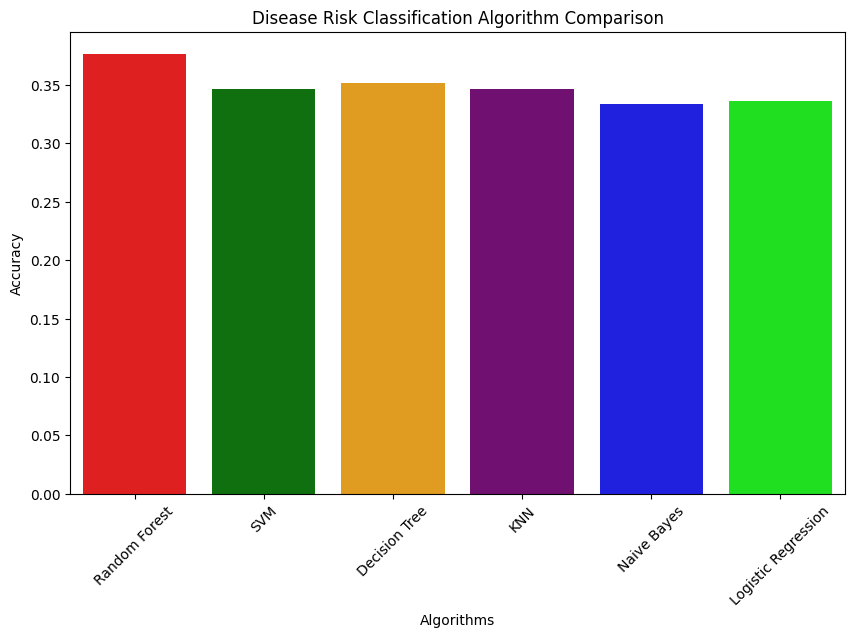

In [43]:
# try all classification algorithms for disease risk
results_d = {}
for name, clf in classifiers.items():
    clf.fit(X_train_d, y_train_d)
    y_pred_d = clf.predict(X_test_d)
    accuracy_d = accuracy_score(y_test_d, y_pred_d)
    results_d[name] = accuracy_d
    print(f"{name} Disease Risk Accuracy: {accuracy_d:.2f}")
    print(classification_report(y_test_d, y_pred_d))
    print(confusion_matrix(y_test_d, y_pred_d))
# Plotting the results for disease risk
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results_d.keys()), y=list(results_d.values()),palette=['red', 'green', 'orange', 'purple','blue','lime'])
plt.title('Disease Risk Classification Algorithm Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

### **After Scaling**

Random Forest Disease Risk Accuracy (Scaled): 0.36
              precision    recall  f1-score   support

        High       0.36      0.38      0.37       208
         Low       0.35      0.38      0.37       189
      Medium       0.38      0.33      0.35       203

    accuracy                           0.36       600
   macro avg       0.36      0.36      0.36       600
weighted avg       0.36      0.36      0.36       600

[[80 69 59]
 [67 71 51]
 [77 60 66]]
SVM Disease Risk Accuracy (Scaled): 0.34
              precision    recall  f1-score   support

        High       0.34      0.57      0.42       208
         Low       0.36      0.24      0.29       189
      Medium       0.33      0.20      0.25       203

    accuracy                           0.34       600
   macro avg       0.34      0.34      0.32       600
weighted avg       0.34      0.34      0.32       600

[[118  47  43]
 [103  45  41]
 [128  34  41]]
Decision Tree Disease Risk Accuracy (Scaled): 0.37
            

/tmp/ipython-input-436525950.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results_d_scaled.keys()), y=list(results_d_scaled.values()),palette=['red', 'green', 'orange', 'purple','blue','lime'])


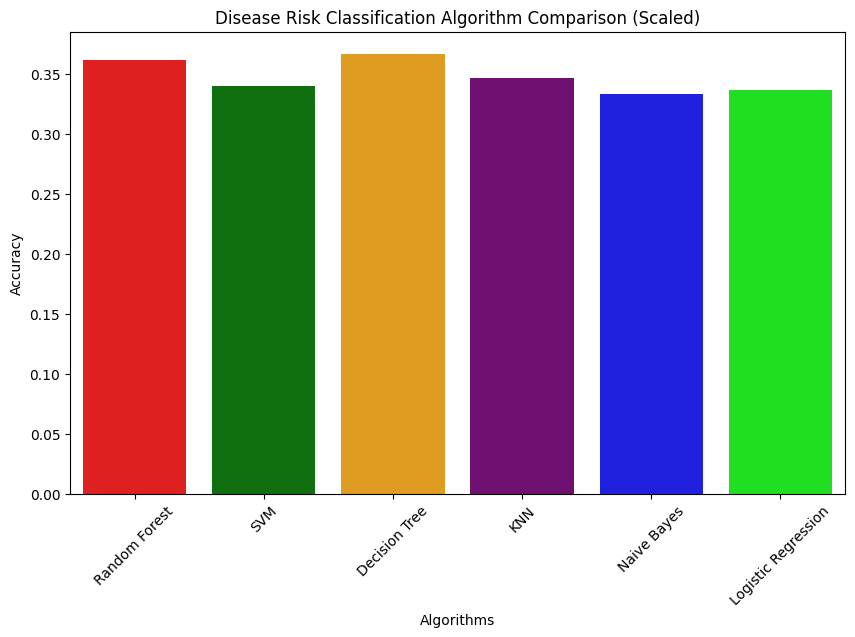

In [45]:
scaler = StandardScaler()
X_d = scaler.fit_transform(X_d)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)
# try all classification algorithms for disease risk after scaling
results_d_scaled = {}
for name, clf in classifiers.items():
    clf.fit(X_train_d, y_train_d)
    y_pred_d_scaled = clf.predict(X_test_d)
    accuracy_d_scaled = accuracy_score(y_test_d, y_pred_d_scaled)
    results_d_scaled[name] = accuracy_d_scaled
    print(f"{name} Disease Risk Accuracy (Scaled): {accuracy_d_scaled:.2f}")
    print(classification_report(y_test_d, y_pred_d_scaled))
    print(confusion_matrix(y_test_d, y_pred_d_scaled))
# Plotting the results for disease risk after scaling
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results_d_scaled.keys()), y=list(results_d_scaled.values()),palette=['red', 'green', 'orange', 'purple','blue','lime'])
plt.title('Disease Risk Classification Algorithm Comparison (Scaled)')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

## **Catboost**

In [48]:
X_cat=df.drop(['Sample_ID','Disease_Risk'], axis=1)
y_cat=df['Disease_Risk']
cat_features= X_cat.select_dtypes(include=['object']).columns.tolist()
#split the data for categorical features
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)
# catboost for categorical features
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=0,cat_features=cat_features)
catboost_model.fit(X_train_cat, y_train_cat)

In [49]:
# results for catboost
y_pred_cat = catboost_model.predict(X_test_cat)
print(f"CatBoost Disease Risk Accuracy: {accuracy_score(y_test_cat, y_pred_cat):.2f}")
print(classification_report(y_test_d, y_pred_cat))
print(confusion_matrix(y_test_d, y_pred_cat))

CatBoost Disease Risk Accuracy: 0.34
              precision    recall  f1-score   support

        High       0.36      0.38      0.37       208
         Low       0.33      0.36      0.35       189
      Medium       0.32      0.28      0.30       203

    accuracy                           0.34       600
   macro avg       0.34      0.34      0.34       600
weighted avg       0.34      0.34      0.34       600

[[80 65 63]
 [67 68 54]
 [76 71 56]]
